# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv
import re

# Import API key
import sys
import os
key = "C:\\Users\\Kelly\\Desktop\\KEYS"
sys.path.append(key)
from OpenWeatherAPI import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.title()
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#I created this section to store the latitude and longitude of my cities for use later in the project.
latitude = lats.tolist()
longitude = lngs.tolist()
city_info = pd.DataFrame(list(zip(cities, latitude, longitude)), 
               columns =["City Name", "Latitude", "Longitude"]) 

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
ident = []
name = []
weather = []
clouds = []
wind = []

#for this section, I created the to_end variable to provide a countdown to the end of the loop, which I found more useful
    #than counting up as the assignment suggested. I also used an if/else statement print a final statement when the loop
    #finishes iterating.

for city in cities:
    try:
        query_url = f"{url}q={city}&appid={weather_api_key}"
        weather_response = requests.get(query_url).json()
        ident.append(weather_response['id'])
        name.append(weather_response['name'])
        weather.append(weather_response['main'])
        wind.append(weather_response['wind'])
        clouds.append(weather_response['clouds'])
        index = cities.index(city)
        to_end = (len(cities))-index-1
        if to_end == 0:
            print(f'Now processing data for {weather_response["name"]}, city #{weather_response["id"]}.')
            print(f'All city data is now processed.')
        else:
            print(f'Now processing data for {weather_response["name"]}, city #{weather_response["id"]}. {to_end} more cities to process.')
    except:
        print(f'{city} was not found in our dataset, so we will not be collecting data for this city.')

Now processing data for Östersund, city #2685750. 616 more cities to process.
Now processing data for Qaanaaq, city #3831208. 615 more cities to process.
Now processing data for Ketchikan, city #5554428. 614 more cities to process.
Now processing data for Bluff, city #2206939. 613 more cities to process.
Now processing data for Balkhash, city #1525798. 612 more cities to process.
Now processing data for Havelock, city #4470244. 611 more cities to process.
Now processing data for Fairbanks, city #5861897. 610 more cities to process.
Now processing data for Esperance, city #2071860. 609 more cities to process.
Now processing data for Rikitea, city #4030556. 608 more cities to process.
Now processing data for Albany, city #5106841. 607 more cities to process.
Now processing data for Ilulissat, city #3423146. 606 more cities to process.
Now processing data for Puerto Ayora, city #3652764. 605 more cities to process.
Ijaki was not found in our dataset, so we will not be collecting data for 

Now processing data for Saldanha, city #3361934. 511 more cities to process.
Now processing data for Pundaguitan, city #1698289. 510 more cities to process.
Now processing data for Lere, city #2332079. 509 more cities to process.
Now processing data for Los Llanos de Aridane, city #2514651. 508 more cities to process.
Now processing data for Dhidhdhoo, city #1337612. 507 more cities to process.
Now processing data for Talcahuano, city #3870282. 506 more cities to process.
Now processing data for Brownsville, city #4676740. 505 more cities to process.
Now processing data for Saint-Philippe, city #935215. 504 more cities to process.
Now processing data for Tarko-Sale, city #1490085. 503 more cities to process.
Mizpe Ramon was not found in our dataset, so we will not be collecting data for this city.
Now processing data for Khatanga, city #2022572. 501 more cities to process.
Now processing data for Tiksi, city #2015306. 500 more cities to process.
Now processing data for Cedar City, city

Now processing data for Kavieng, city #2094342. 406 more cities to process.
Now processing data for Carbonia, city #2525362. 405 more cities to process.
Now processing data for Chokurdakh, city #2126123. 404 more cities to process.
Kamenskoye was not found in our dataset, so we will not be collecting data for this city.
Now processing data for Khanbari, city #1283217. 402 more cities to process.
Now processing data for Río Gallegos, city #3838859. 401 more cities to process.
Now processing data for Saint George, city #5546220. 400 more cities to process.
Now processing data for Wanning, city #1791779. 399 more cities to process.
Now processing data for Eqbālīyeh, city #406993. 398 more cities to process.
Jiddah was not found in our dataset, so we will not be collecting data for this city.
Now processing data for Mariager, city #2617076. 396 more cities to process.
Samusu was not found in our dataset, so we will not be collecting data for this city.
Now processing data for Chanute, city

Now processing data for Padang, city #1633419. 302 more cities to process.
Now processing data for Nambucca Heads, city #2155858. 301 more cities to process.
Now processing data for Verāval, city #1253237. 300 more cities to process.
Now processing data for Aswān, city #359792. 299 more cities to process.
Now processing data for Sørland, city #3137469. 298 more cities to process.
Panjwin was not found in our dataset, so we will not be collecting data for this city.
Now processing data for Upata, city #3625710. 296 more cities to process.
Now processing data for Ust-Kuyga, city #2013921. 295 more cities to process.
Now processing data for Bell Ville, city #3864331. 294 more cities to process.
Now processing data for Kabanjahe, city #1214965. 293 more cities to process.
Now processing data for Twentynine Palms, city #5404198. 292 more cities to process.
Now processing data for Terrace, city #6162949. 291 more cities to process.
Now processing data for Takoradze, city #2294915. 290 more c

Now processing data for Khilok, city #2022463. 197 more cities to process.
Now processing data for Ewo, city #2260009. 196 more cities to process.
Now processing data for Burdur, city #320392. 195 more cities to process.
Now processing data for Ust'-Ilimsk, city #2013952. 194 more cities to process.
Now processing data for Tha Bo, city #1605677. 193 more cities to process.
Now processing data for Mareeba, city #2158767. 192 more cities to process.
Tongsa was not found in our dataset, so we will not be collecting data for this city.
Now processing data for Monrovia, city #2274895. 190 more cities to process.
Now processing data for Yashkul', city #468747. 189 more cities to process.
Now processing data for Mbalmayo, city #2228079. 188 more cities to process.
Now processing data for Kagoro, city #2335614. 187 more cities to process.
Now processing data for Lata, city #2738381. 186 more cities to process.
Bolungarvik was not found in our dataset, so we will not be collecting data for this

Now processing data for Río Cuarto, city #3838874. 91 more cities to process.
Now processing data for Niles, city #4903730. 90 more cities to process.
Now processing data for Senador José Porfírio, city #3387928. 89 more cities to process.
Now processing data for Erzin, city #296852. 88 more cities to process.
Phan Rang was not found in our dataset, so we will not be collecting data for this city.
Tsihombe was not found in our dataset, so we will not be collecting data for this city.
Now processing data for Inhambane, city #1045114. 85 more cities to process.
Now processing data for Baoding, city #1816971. 84 more cities to process.
Now processing data for Hūn, city #2216645. 83 more cities to process.
Now processing data for Bang Racham, city #1619281. 82 more cities to process.
Now processing data for Pandamatenga, city #933178. 81 more cities to process.
Now processing data for Linhares, city #3458498. 80 more cities to process.
Now processing data for Shebunino, city #2121324. 79 m

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
rows = zip(ident,name,clouds,wind,weather)
with open("city_data.csv", "w", encoding="utf-8") as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)

In [5]:
ugly_df = pd.read_csv('city_data.csv', header = None)
ugly_df.columns = ["City ID", "City Name", "Cloudiness", "Wind Speed", "Weather Data"]

ugly_weather_df = pd.DataFrame(ugly_df["Weather Data"].str.split(',', expand=True).values,
             columns=["Temperature", "Feels Like", "Min Temp", "Max Temp", "Barometric Pressure", "Humidity", "Sea Level", "Ground Level"])
better_df = ugly_df.join(ugly_weather_df).drop(["Weather Data"], axis =1)

#i feel like there is probably a better way to code this section? this seems very heavy-handed. i tried to figure
    #out a way to loop through the column names and perform the chained functions that way, but i couldn't get it to work.
better_df["Temperature"] = better_df["Temperature"].str.split().str[-1].str.replace('\W', '').replace('}','',regex=True).astype(float)
better_df["Feels Like"] = better_df["Feels Like"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Min Temp"] = better_df["Min Temp"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Max Temp"] = better_df["Max Temp"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Barometric Pressure"] = better_df["Barometric Pressure"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Humidity"] = better_df["Humidity"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Sea Level"] = better_df["Sea Level"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Ground Level"] = better_df["Ground Level"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Wind Speed"] = better_df["Wind Speed"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Cloudiness"] = better_df["Cloudiness"].str.split().str[-1].replace('}','',regex=True).astype(float)

better_df

,City ID,City Name,Cloudiness,Wind Speed,Temperature,Feels Like,Min Temp,Max Temp,Barometric Pressure,Humidity,Sea Level,Ground Level
0,2685750,Östersund,99.0,100.00,2721.0,267.45,272.04,272.15,1013.0,100.0,NaN,NaN
1,3831208,Qaanaaq,100.0,59.00,26381.0,258.75,263.81,263.81,1010.0,81.0,1010.0,1010.0
2,5554428,Ketchikan,1.0,60.00,27415.0,269.83,274.15,274.15,1011.0,80.0,NaN,NaN
3,2206939,Bluff,56.0,11.62,28537.0,280.11,285.37,285.37,1025.0,80.0,NaN,NaN
4,1525798,Balkhash,0.0,70.00,25215.0,244.26,252.15,252.15,1037.0,83.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
558,1805518,Jining,0.0,6.00,27508.0,266.40,275.08,275.08,1031.0,69.0,1031.0,1026.0
559,1856434,Murakami,75.0,360.00,27915.0,270.62,279.15,279.15,1013.0,87.0,NaN,NaN
560,2171069,Colac,100.0,5.81,29935.0,298.82,297.04,300.93,1017.0,45.0,NaN,NaN
561,3698608,Celendín,100.0,118.00,28458.0,284.25,284.58,284.58,1016.0,92.0,1016.0,748.0


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#checking if any cities in my dataframe have humidty > 100%
better_df.sort_values(["Humidity"], ascending=False)


,City ID,City Name,Cloudiness,Wind Speed,Temperature,Feels Like,Min Temp,Max Temp,Barometric Pressure,Humidity,Sea Level,Ground Level
0,2685750,Östersund,99.0,100.0,2721.0,267.45,272.04,272.15,1013.0,100.0,NaN,NaN
129,964420,Port Elizabeth,90.0,20.0,29015.0,292.18,290.15,290.15,1017.0,100.0,NaN,NaN
475,5554072,Juneau,75.0,51.0,26999.0,264.62,267.59,273.15,1014.0,100.0,NaN,NaN
454,3183087,Provincia di Ancona,98.0,270.0,27835.0,275.45,277.04,279.15,1006.0,100.0,NaN,NaN
30,5282297,Bethel,90.0,220.0,2796.0,276.92,279.15,279.82,1015.0,100.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
139,2065594,Mount Isa,40.0,80.0,31015.0,308.72,310.15,310.15,1008.0,23.0,NaN,NaN
424,6533368,Moranbah,76.0,146.0,30508.0,299.93,305.08,305.08,1007.0,23.0,1007.0,978.0
317,2160413,Leeton,80.0,30.0,30315.0,299.00,303.15,303.15,1019.0,22.0,NaN,NaN
135,2173911,Broken Hill,100.0,11.8,30515.0,299.27,305.15,305.15,1014.0,18.0,NaN,NaN


In [7]:
#  Get the indices of cities that have humidity over 100%.
clean_city_data = better_df.loc[better_df['Humidity'] < 101]
clean_city_data

,City ID,City Name,Cloudiness,Wind Speed,Temperature,Feels Like,Min Temp,Max Temp,Barometric Pressure,Humidity,Sea Level,Ground Level
0,2685750,Östersund,99.0,100.00,2721.0,267.45,272.04,272.15,1013.0,100.0,NaN,NaN
1,3831208,Qaanaaq,100.0,59.00,26381.0,258.75,263.81,263.81,1010.0,81.0,1010.0,1010.0
2,5554428,Ketchikan,1.0,60.00,27415.0,269.83,274.15,274.15,1011.0,80.0,NaN,NaN
3,2206939,Bluff,56.0,11.62,28537.0,280.11,285.37,285.37,1025.0,80.0,NaN,NaN
4,1525798,Balkhash,0.0,70.00,25215.0,244.26,252.15,252.15,1037.0,83.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
558,1805518,Jining,0.0,6.00,27508.0,266.40,275.08,275.08,1031.0,69.0,1031.0,1026.0
559,1856434,Murakami,75.0,360.00,27915.0,270.62,279.15,279.15,1013.0,87.0,NaN,NaN
560,2171069,Colac,100.0,5.81,29935.0,298.82,297.04,300.93,1017.0,45.0,NaN,NaN
561,3698608,Celendín,100.0,118.00,28458.0,284.25,284.58,284.58,1016.0,92.0,1016.0,748.0


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#Accomplished in previous section. While the dataset I had in place at the time I wrote this code did not have any
    #cities with humidity higher than 100%, I can't guarantee that if I were to re-run the code and generate a new
    #list of cities that I wouldn't generate a city with a humidity greater than 100, so I decided to write this
    #section of code anyway.

In [9]:
# clean_city_data = clean_city_data.merge(city_info, on="City Name")
clean_city_data = pd.merge(clean_city_data, city_info,
                        how="left", on=["City Name"])
clean_city_data

,City ID,City Name,Cloudiness,Wind Speed,Temperature,Feels Like,Min Temp,Max Temp,Barometric Pressure,Humidity,Sea Level,Ground Level,Latitude,Longitude
0,2685750,Östersund,99.0,100.00,2721.0,267.45,272.04,272.15,1013.0,100.0,NaN,NaN,NaN,NaN
1,3831208,Qaanaaq,100.0,59.00,26381.0,258.75,263.81,263.81,1010.0,81.0,1010.0,1010.0,80.408202,-87.924836
2,5554428,Ketchikan,1.0,60.00,27415.0,269.83,274.15,274.15,1011.0,80.0,NaN,NaN,56.522379,-131.809358
3,2206939,Bluff,56.0,11.62,28537.0,280.11,285.37,285.37,1025.0,80.0,NaN,NaN,-74.343352,166.722030
4,1525798,Balkhash,0.0,70.00,25215.0,244.26,252.15,252.15,1037.0,83.0,NaN,NaN,47.770729,76.240099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,1805518,Jining,0.0,6.00,27508.0,266.40,275.08,275.08,1031.0,69.0,1031.0,1026.0,-84.675357,172.507937
559,1856434,Murakami,75.0,360.00,27915.0,270.62,279.15,279.15,1013.0,87.0,NaN,NaN,-28.987697,-76.687926
560,2171069,Colac,100.0,5.81,29935.0,298.82,297.04,300.93,1017.0,45.0,NaN,NaN,45.407836,-45.186929
561,3698608,Celendín,100.0,118.00,28458.0,284.25,284.58,284.58,1016.0,92.0,1016.0,748.0,NaN,NaN


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

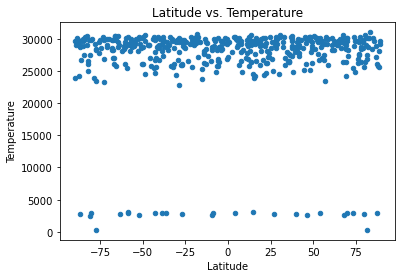

In [24]:
clean_city_data.plot.scatter("Latitude", "Temperature")
plt.title('Latitude vs. Temperature')
plt.savefig('WeatherPy_PNG_files/lat_vs_temp.png')

## Latitude vs. Humidity Plot

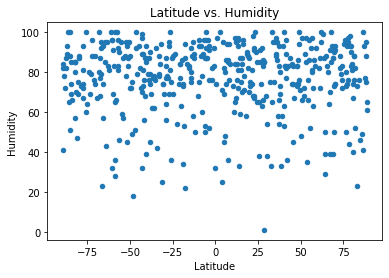

In [25]:
clean_city_data.plot.scatter("Latitude", "Humidity")
plt.title('Latitude vs. Humidity')
plt.savefig('WeatherPy_PNG_files/lat_vs_hum.png')

## Latitude vs. Cloudiness Plot

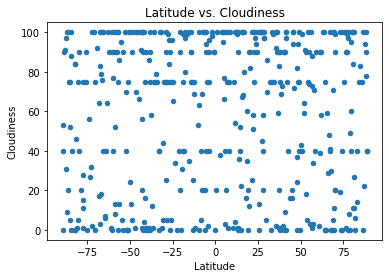

In [26]:
clean_city_data.plot.scatter("Latitude", "Cloudiness")
plt.title('Latitude vs. Cloudiness')
plt.savefig('WeatherPy_PNG_files/lat_vs_cloud.png')

## Latitude vs. Wind Speed Plot

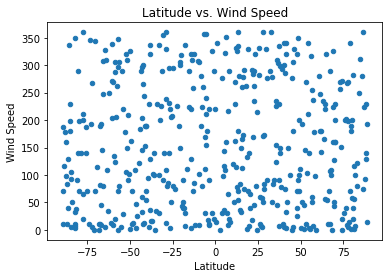

In [27]:
clean_city_data.plot.scatter("Latitude", "Wind Speed")
plt.title('Latitude vs. Wind Speed')
plt.savefig('WeatherPy_PNG_files/lat_vs_wind.png')

## Linear Regression

In [28]:
northern_hem = clean_city_data.loc[clean_city_data['Latitude'] > 0]
southern_hem = clean_city_data.loc[clean_city_data['Latitude'] < 0]
test = clean_city_data.loc[clean_city_data['Latitude'] == 0] # this line was used to test whether any cities happened to
    # fall on the equator, in which case I might consider adjusting my formula. As they do not, and it's unlikely in other
    #datasets that they would, I'm comfortable leaving the data as-is and treating potential cities with a latitude of 0 as
    #outliers.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

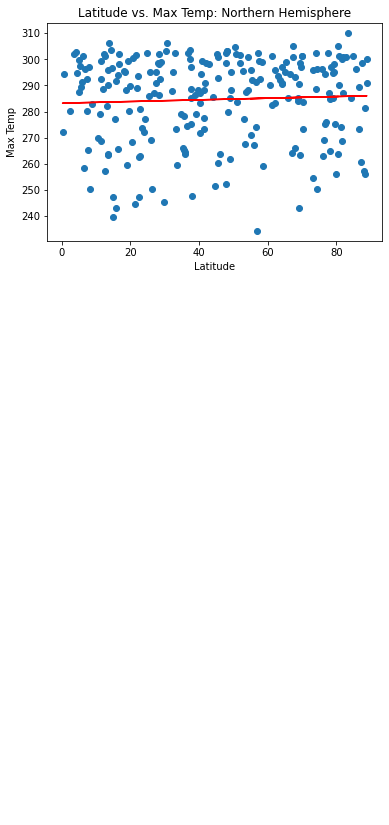

In [29]:
x_values = northern_hem['Latitude']
y_values = northern_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temp: Northern Hemisphere')
plt.savefig('WeatherPy_PNG_files/nh_maxtemp_lat.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

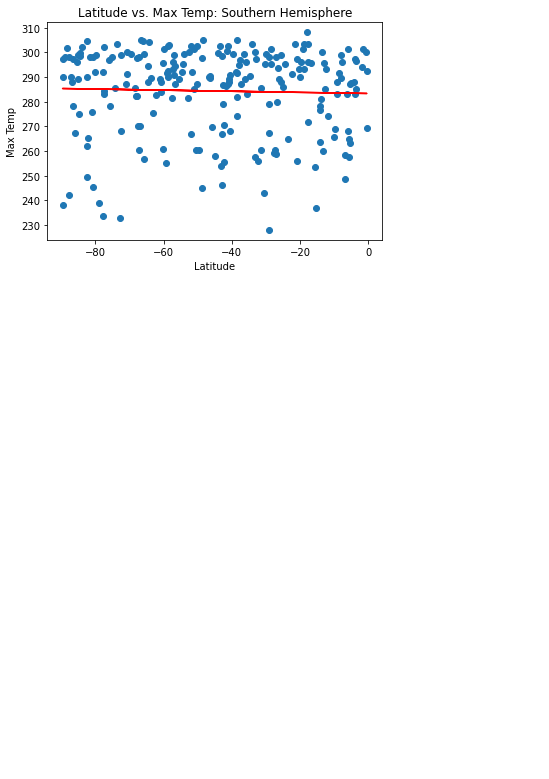

In [30]:
x_values = southern_hem['Latitude']
y_values = southern_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temp: Southern Hemisphere')
plt.savefig('WeatherPy_PNG_files/sh_maxtemp_lat.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

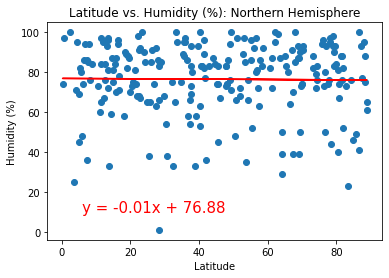

In [31]:
x_values = northern_hem['Latitude']
y_values = northern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity (%): Northern Hemisphere')
plt.savefig('WeatherPy_PNG_files/nh_hum_lat.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

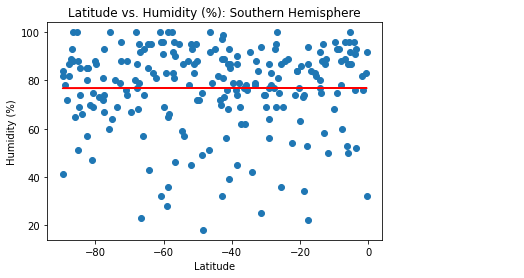

In [32]:
x_values = southern_hem['Latitude']
y_values = southern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity (%): Southern Hemisphere')
plt.savefig('WeatherPy_PNG_files/sh_hum_maxtemp.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

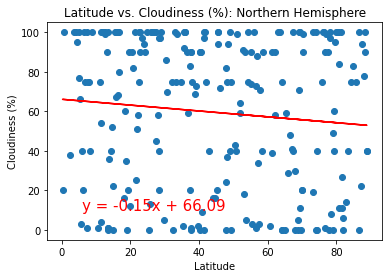

In [33]:
x_values = northern_hem['Latitude']
y_values = northern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness (%): Northern Hemisphere')
plt.savefig('WeatherPy_PNG_files/nh_cloud_lat.png')

#why is there a formula on this chart?

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

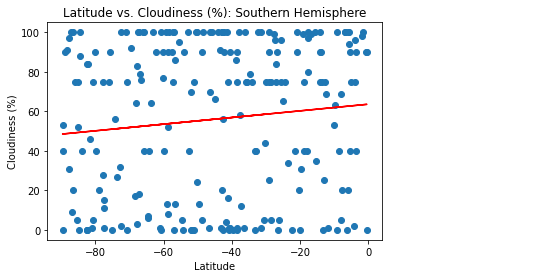

In [34]:
x_values = southern_hem['Latitude']
y_values = southern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness (%): Southern Hemisphere')
plt.savefig('WeatherPy_PNG_files/sh_cloud_lat.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

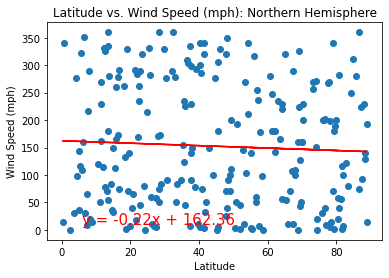

In [35]:
x_values = northern_hem['Latitude']
y_values = northern_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed (mph): Northern Hemisphere')
plt.savefig('WeatherPy_PNG_files/nh_wind_lat.png')
#why is there a formula on this chart?

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

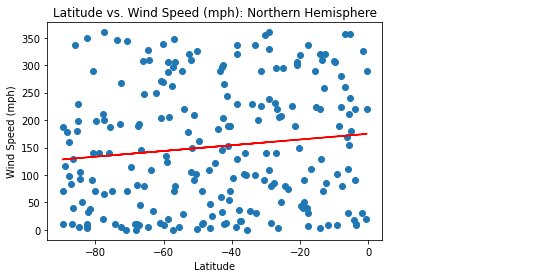

In [36]:
x_values = southern_hem['Latitude']
y_values = southern_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed (mph): Northern Hemisphere')
plt.savefig('WeatherPy_PNG_files/sh_wind_lat.png')